<h1 align='center'>Clustering the Countries by using K-Means for HELP International<h1>

## Latar Belakang

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.


HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

## Objective

Objective pada project ini adalah untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

## Langkah - Langkah pembuatan laporan

1. Import Library  
2. Reading and Understanding Data
3. Exploratory Data Analysis
    - Data Cleaning
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
4. Preprocessing Data
    - Handling Outlier
    - Features Scalling
5. Creating k means clustering and visualizing clusters formed
6. Report countries

### 1. Import Library

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

### 2. Reading and Understanding Data

In [242]:
countries = pd.read_csv('Data_Negara_HELP.csv')
countries.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [243]:
countries.shape

(167, 10)

In [244]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [245]:
countries.select_dtypes(include='object').describe()

,Negara
count,167
unique,167
top,Sri Lanka
freq,1


Pada tahap reading and understanding data ini menunjukan bahwa di dalam data tersebut memiliki 10 kolom (termasuk nama negara) dan 167 baris (unique of countries), berikut merupakan penjelasan dari setiap kolom pada dataset:

- Negara: Nama negara
- Kematian anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor: Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorangan
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP
- Harapan hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

Dataset tersebut memiliki 1 kolom bertipe data object yaitu nama negara dan 9 kolom lainnya berupa karakteristik dari negara - negara tersebut (atau bisa disebut features), karakteristik dari setiap negara memiliki 2 jenis tipe data, yaitu 2 tipe data integer dan 7 tipe data float

dataset yang berukuran kurang lebih 13.2 Kb tersebut tidak memiliki missing value atau bisa dibilang dataset yang kita miliki lengkap, sehingga tidak perlu dilakukan handling missing value

Untuk selanjutnya kita akan melihat ringkasan statistik dari karakteristik negara

In [246]:
countries.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Berikut merupakan hasil ringkasan statistik sederhana dari karakteristik setiap negara :
- Rata - rata kematian anak dari seluruh negara sebesar 38,27 dengan kematian anak terbesarnya adalah 208
- Rata - rata harapan hidup dari seluruh negara sebesar 70,555689
- Jumlah fertiliti terbesar dari seluruh negara sebesar 7,49
- Total pengeluran kesehatan diseluruh dunia memiliki rata rata pengeluaran sebesar 6,815689
- Rata - rata pendapatan bersih perorangan dari seluruh negara yaitu 17144,688623
- Pengukuran tingkat pertumbuhan tahunan dari Total GDP (Inflasi) Terkecil dari seluruh negara yaitu -4,21
- GDP perkapita dari seluruh negara memiliki rata - rata sebesar 12964 dengan GDP terkecil yaitu sebesar 231
- Angka ekspor terbesar yaitu 200 dengan rata - rata ekspor seluruh negara 41,108976
- Sedangakan Angka impor terbesar yaitu 174 dengan rata - rata impor seluruh negara 46,890215

### 3. Exploratory Data Analysis

Pada exploratory data analysis ini akan dilakukan 3 tahap analisis, yaitu univariate analysis, bivariate analysis, dan multivariate analysis.

#### a. Univariate Analysis

Pada univariate analysis, akan dilakukan ploting histogram untuk melihat distribusi dari setiap features (atau karakteristik negara), hal ini dilakukan untuk mengetahui dimana data itu terkonsentrasi dan apakah data itu teridentifikasi adanya outliers.

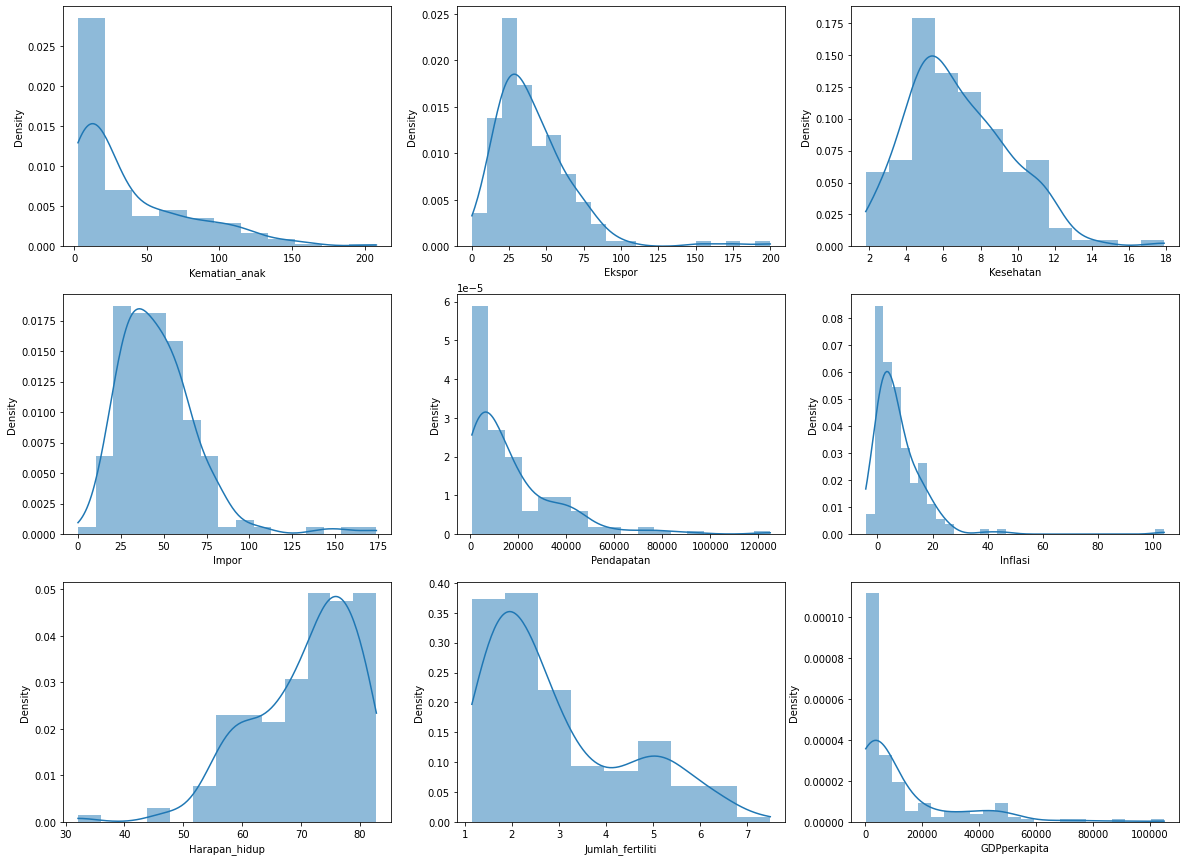

In [247]:
plt.figure(figsize=(20,15))

for i in enumerate(countries.describe().columns):
    plt.subplot(3,3,i[0]+1)
    sns.histplot(countries[i[1]],kde=True, stat="density", linewidth=0)
plt.show()

Jika kita melihat kesulurah distribusi dari setiap features, maka kita akan langsung mengetahui bahwa features tersebut terindikasi memiliki outlier. Lalu grafik distribusi feature tersebut memiliki skewnees baik itu positif maupun negatif.

- Pada feature kematian anak memiliki skewnees positif, bisa dilihat bahwa rata rata kematian anak berada disekitar 10 - 70 yang mana ini merupakan angka yang relatif kecil, tetapi pada beberapa negara yang memiliki kematian anak yang tinggi.
- Pada feature Ekspor memiliki skewnees positif, pemusatan tingkat ekspor dari negara berada disekitar 20 - 60, dan pada tingkat ekspor ini terdapat negara yang memiliki tingkat ekspor yang tinggi dimana ini terlampau jauh dari pemusatan data
- Pada feature kesehatan memiliki skewnees positif, pemusatan data berada disekitar angka 4 -10, standard deviasi pada feature juga relatif kecil hanya beberapa negara yang memiliki angka kesehatan yang tinggi.
- Pada feature impor hampir mendekati terdistribusi normal namun feature impor ini memiliki outlier sehingga distribusi datanya skewnees positif, pemusatan data berada di sekitar angka 25-75 dan terdapat beberaoa negara yang memiliki angka impor yang tingii
- Pada feature pendapatan memiliki skewness positif, yang pemusatan datanya berada disekitar 0 - 20000 dan terdapat beberapa negara dengan tingkat pendapatan yang tinggi terlampau jauh dari pemusatan data.
- Pada feature inflasi memiliki skewness positif, yang pemusatan datanya berada disekitar 0 - 20, dan terdapat sebuah negara yang memiliki angka inflasi yang sangat tinggi
- Pada feature harapan hidup memiliki skewness negatif, yang pemusatan datanya berada disekitar 60-80
- Pada feature jumlah fertiliti memiliki skewness positif, yang pemusatan datanya berada disekitar 1-3
- Pada feature GDP perkapita memiliki skewness positif yang tinggi, dimana pemusatan datanya berada hanya disekitar 0 - 10000 dan terdapat negara yang memiliki GDP perkapita yang sangat tinggi yaitu di angka 100000.

Dari semua grafik diatas terindikasi memiliki outliners, outliners ini akan dianalisis lebih dalam lagi untuk dilakukan treatments outliners pada tahap preprocessing data

#### b. Bivariate Analysis

Pada bivariate analisys ini, akan dilakukan ploting untuk masing - masing features untuk menjawab pertanyaan sederhana yaitu "5 negara mana yang memiliki (features) tertinggi dan terendah". Pertanyaan tersebut dapat membantu untuk apa yang harus dilakukan ketika menemukan outliers dari suatu features

##### 5 Negara dengan angka kematian anak tertinggi dan terendah

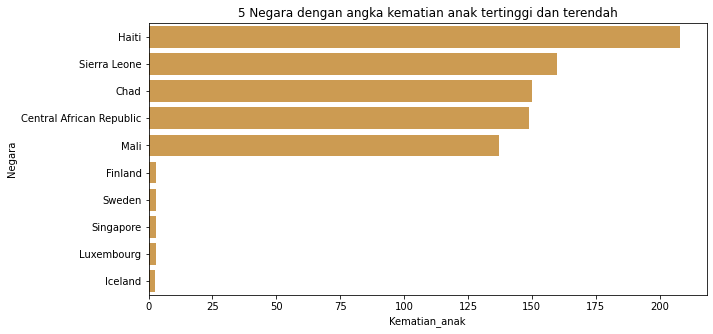

In [248]:
kematian_anak = countries[['Negara','Kematian_anak']].sort_values('Kematian_anak',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan angka kematian anak tertinggi dan terendah")
sns.barplot(x='Kematian_anak',y='Negara',data=kematian_anak,color='#e09f3e')
plt.show()

##### 5 Negara dengan kesehatan tertinggi dan terendah

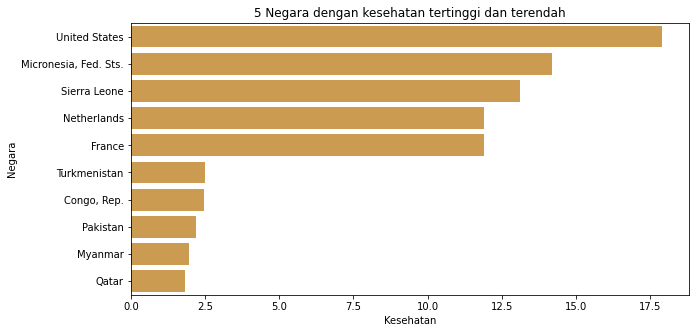

In [249]:
kesehatan = countries[['Negara','Kesehatan']].sort_values('Kesehatan',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan kesehatan tertinggi dan terendah")
sns.barplot(x='Kesehatan',y='Negara',data=kesehatan,color='#e09f3e')
plt.show()

##### 5 Negara dengan harapan hidup tertinggi dan terendah

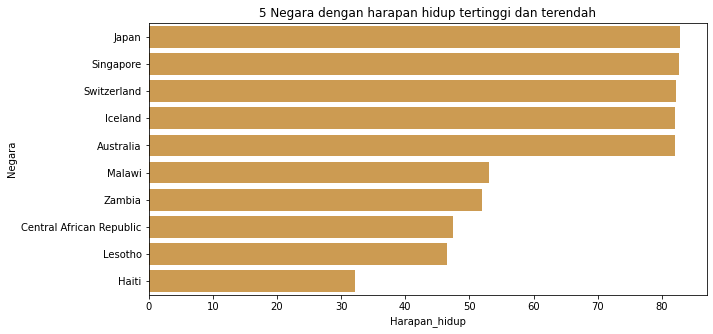

In [250]:
harapan_hidup = countries[['Negara','Harapan_hidup']].sort_values('Harapan_hidup',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan harapan hidup tertinggi dan terendah")
sns.barplot(x='Harapan_hidup',y='Negara',data=harapan_hidup,color='#e09f3e')
plt.show()

##### 5 Negara dengan jumlah fertiliti tertinggi dan terendah

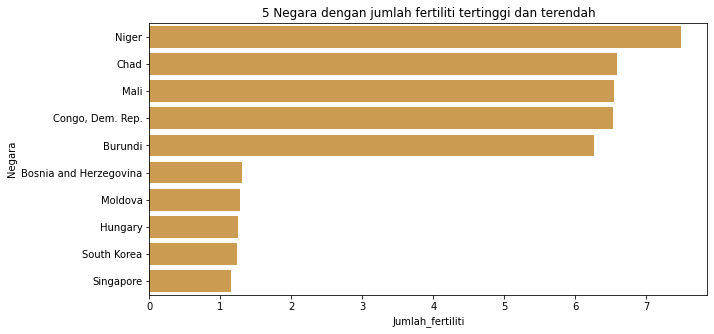

In [251]:
jumlah_fertiliti = countries[['Negara','Jumlah_fertiliti']].sort_values('Jumlah_fertiliti',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan jumlah fertiliti tertinggi dan terendah")
sns.barplot(x='Jumlah_fertiliti',y='Negara',data=jumlah_fertiliti,color='#e09f3e')
plt.show()

##### 5 Negara dengan ekspor tertinggi dan terendah

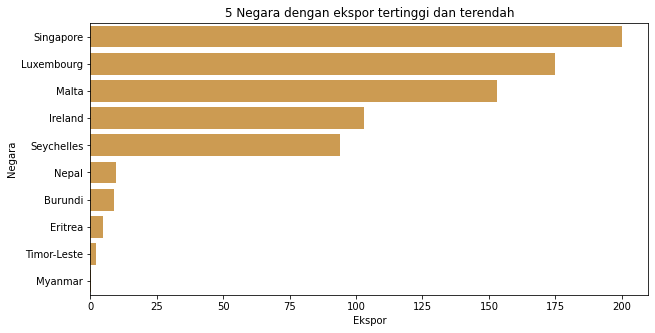

In [252]:
ekspor = countries[['Negara','Ekspor']].sort_values('Ekspor',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan ekspor tertinggi dan terendah")
sns.barplot(x='Ekspor',y='Negara',data=ekspor,color='#e09f3e')
plt.show()

##### 5 Negara dengan impor tertinggi dan terendah

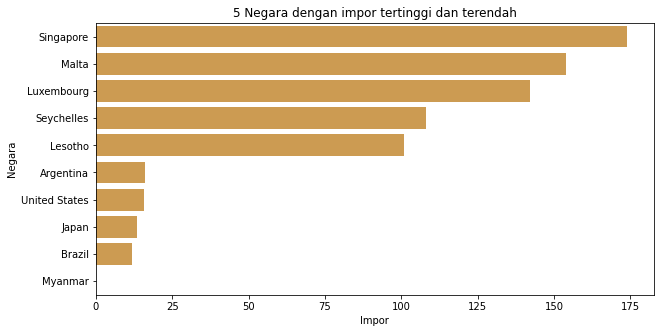

In [253]:
impor = countries[['Negara','Impor']].sort_values('Impor',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan impor tertinggi dan terendah")
sns.barplot(x='Impor',y='Negara',data=impor,color='#e09f3e')
plt.show()

##### 5 Negara dengan inflasi tertinggi dan terendah

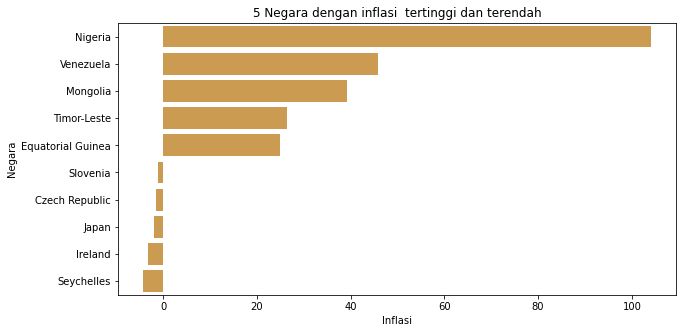

In [254]:
inflasi  = countries[['Negara','Inflasi']].sort_values('Inflasi',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan inflasi  tertinggi dan terendah")
sns.barplot(x='Inflasi',y='Negara',data=inflasi ,color='#e09f3e')
plt.show()

##### 5 Negara dengan pendapatan tertinggi dan terendah

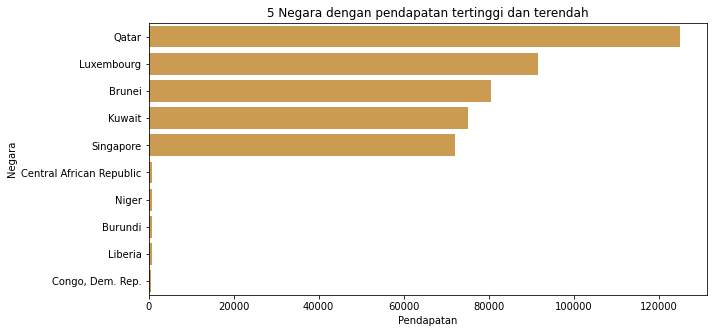

In [255]:
pendapatan = countries[['Negara','Pendapatan']].sort_values('Pendapatan',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan pendapatan tertinggi dan terendah")
sns.barplot(x='Pendapatan',y='Negara',data=pendapatan,color='#e09f3e')
plt.show()

##### 5 Negara dengan GDP perkapita tertinggi dan terendah

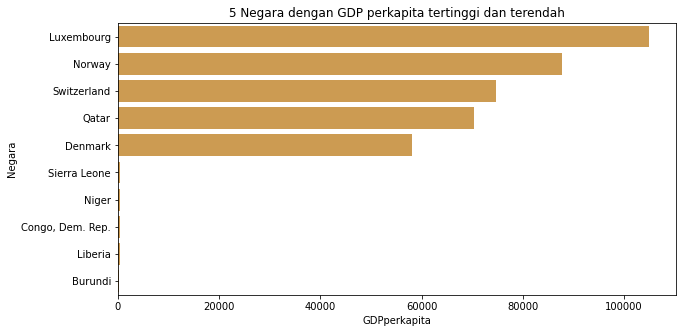

In [256]:
gdp_perkapita = countries[['Negara','GDPperkapita']].sort_values('GDPperkapita',ascending=False).reset_index(drop=True).drop(countries.index[5:-5])
plt.figure(figsize=(10,5))
plt.title("5 Negara dengan GDP perkapita tertinggi dan terendah")
sns.barplot(x='GDPperkapita',y='Negara',data=gdp_perkapita,color='#e09f3e')
plt.show()

Dari hasil ploting grafik diatas menunjukan bahwa untuk setiap negara yang memiliki angka harapan hidup tinggi, GDP perkapita, pendapatan, impor, dan ekspor yang tinggi merupakan negara maju, jika sebalikanya maka negara tersebut merupakan negara berkembang . Sedangkan untuk setiap negara yang memiliki angka kematian anak, jumlah fertiliti, dan inflasi yang tinggi merupakan negara berkembang, dan juga sebaliknya maka negara tersebut merupakan negara maju.

#### c. Multivariate Analysis

Pada multivariate analysis ini, akan dilakukan ploting untuk melihat hubungan korelasi antar feature

In [257]:
corr = countries.corr()

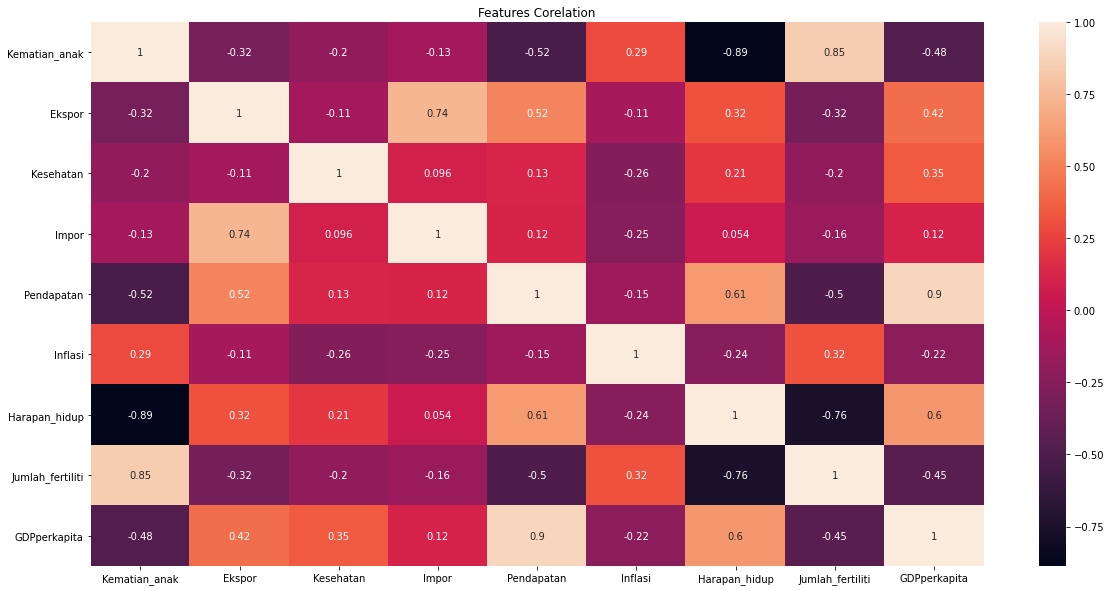

In [258]:
plt.figure(figsize=(20,10))
plt.title("Features Corelation")
sns.heatmap(corr,annot=True)
plt.show()

Berikut merupakan feature yang memiliki nilai korelasi yang kuat yaitu diatas 0,41 atau dibawah -0,41:
- kematian anak : berkorelasi dengan pendapatan,harapan_hidup, jumlah fertiliti, dan GDP perkapita
- Ekspor : berkorelasi dengan Impor, pendapatan, dan GDP perkapita
- Kesehatan : tidak memiliki korelasi yang kuat dengan feature manapun
- impor : hanya borkorelasi dengan ekspor
- Pendapatan : berkorelasi dengan kematian anak, ekspor, harapan hidup,jumlah fertiliti, dan GDP perkapita,
- Inflasi : tidak memiliki korelasi yang kuat dengan feature manapun
- harapan hidup : berkorelasi dengan kematian anak, pendapatan, jumlah fertiliti, dan GDP perkapita
- jumlah fetiliti : berkorelasi dengan kematian anak, pendapatan, harapan hidup, dan GDP perkapita
- GDP perkapita : berkorelasi dengan kematian anak, ekspor, pendapatan, harapan hidup, dan jumlah fertiliti

### 4. Preprocessing data

Pada tahap preprocessing data ini akan dilakukan beberapa tahapan yaitu :
1. Handling outiler, untuk menghilangkan outlier pada sebuah feature yang mana ini berfungsi agar tidak terdapat noise ketika dilakukan clustering
3. Features scaling, yaitu mengubah range setiap feature agar memiliki range nilai yang sama.

#### a. Handling Outlier

Untuk mendeteksi ada atau tidaknya outlier pada sebuah feature, akan dilakukan ploting boxplot pada setiap feature.

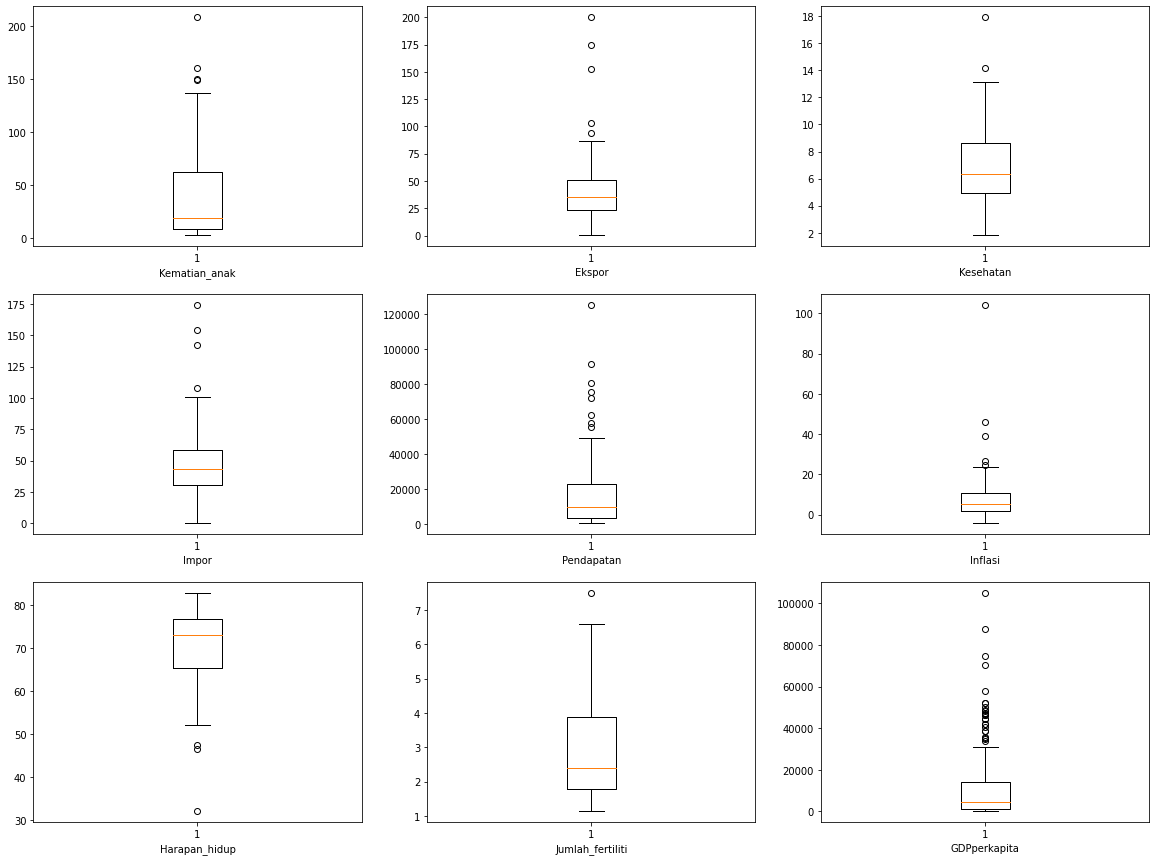

In [259]:
plt.subplots(figsize=(20,15))
for i in range(1,len(countries.columns)):
    plt.subplot(3,3,i)
    plt.boxplot(countries.iloc[:,i])
    plt.xlabel(countries.columns[i])
plt.show()

mengingat tujuan dari project ini yaitu untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan dan memilih prioritas negara mana yang paling membutuhkan bantuan. Pada tahap bivariate analysis kita juga menemukan bahwa untuk setiap negara yang memiliki angka harapan hidup tinggi, GDP perkapita, pendapatan, impor, dan ekspor yang tinggi merupakan negara maju dan untuk setiap negara yang memiliki angka kematian anak, jumlah fertiliti, dan inflasi yang tinggi merupakan negara berkembang, mengingat bahwa negara maju memiliki pemerataan ekonomi yang bagus dan negara berkembang merupakan negara yang membutuhkan bantuan untuk itu features harapan hidup tinggi, GDP perkapita, pendapatan, impor, dan ekspor akan dilakukan droping nilai outlier untuk mengatasi outliers jika masih terdapat nilai outlier maka akan dilakukan penggantian nilai oulier dengan nilai upper bound atau lower bound. Sedangakan untuk feature kematian anak, jumlah fertiliti, dan inflasi akan dilakukan perubahan nilai yaitu dengan mengganti nilai outlier tersebut dengan nilai upper bound atau lower bound

In [260]:
drop_columns = ['Harapan_hidup','Ekspor','Impor','Pendapatan','GDPperkapita']
bound_columns = ['Kematian_anak','Jumlah_fertiliti','Inflasi']

##### Discover outliers with Interquatile

In [261]:
def interquartile(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    lower_bound= q1 - (iqr * 1.5)
    upper_bound= q3 + (iqr * 1.5)
    return lower_bound,upper_bound

def drop_outlier(x,column):
    lower_bound,upper_bound = interquartile(x[column])
    removed = x[~((x[column]<lower_bound) | (x[column]>upper_bound)).any(axis=1)]
    return removed

def bound_outlier(x,column):
    lower_bound,upper_bound = interquartile(x[column])
    median = x[column].mean()
#     x[column] = np.where((x[column]<lower_bound)|(x[column]>upper_bound),median,x[column])
    x[column] = np.where((x[column]<lower_bound),lower_bound,x[column])
    x[column] = np.where((x[column]>upper_bound),upper_bound,x[column])
    return x

#### Drop outlier in columns ['Harapan_hidup','Ekspor','Impor','Pendapatan','GDPperkapita']

In [262]:
outlier_removed1 = drop_outlier(countries,drop_columns).reset_index().drop(columns=['index'],axis=1)

#### Change outlier value with upper bound or lower bound in columns ['Kematian_anak','Jumlah_fertiliti','Inflasi']

In [263]:
outlier_removed2 = bound_outlier(outlier_removed1,countries.columns[1:]).reset_index().drop(columns=['index'],axis=1)

In [264]:
country = outlier_removed2.iloc[:,0]
outlier_removed = outlier_removed2.iloc[:,1:]

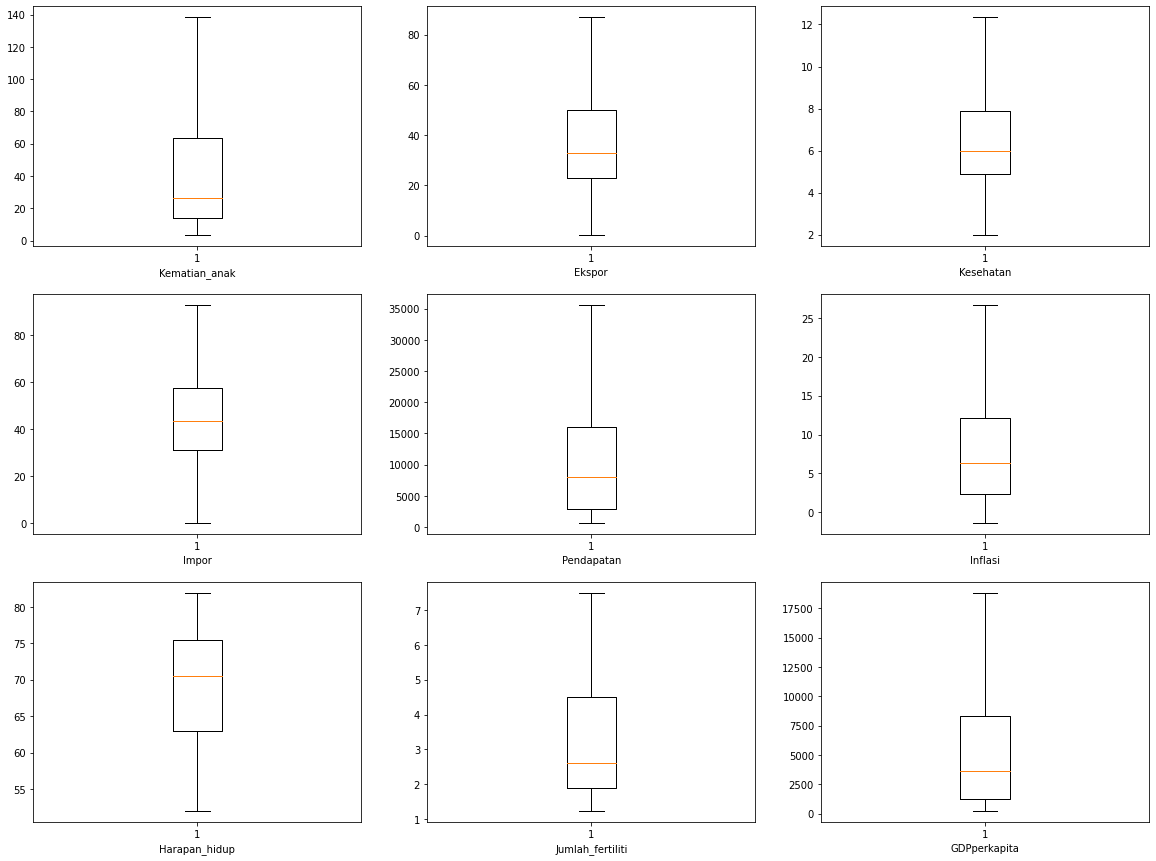

In [265]:
plt.subplots(figsize=(20,15))
for i in range(0,len(outlier_removed.columns)):
    plt.subplot(3,3,i+1)
    plt.boxplot(outlier_removed.iloc[:,i])
    plt.xlabel(outlier_removed.columns[i])
plt.show()

setelah dilakukan outlier treatment, hasil dari dari boxplot diatas menunjukan tidak ada lagi outlier pada setiap feature yang ada.

#### b. Features Scaling

Untuk membuat performa terbaik pada model clustering, kita perlu melakukan features scaling. Feature scaling merupakan sebauh teknik untuk membuat semua feature pada dataset mempunyai rentang nilai yang sama. salah satu teknik feature scaling yang populer adalah standardization, atau membuat range feature antara -1 sampai 1

In [266]:
sc = StandardScaler()

In [267]:
countries_std = pd.DataFrame(sc.fit_transform(outlier_removed),columns=outlier_removed.columns)

In [268]:
countries_std.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.305830,-1.422781,0.520962,-0.004687,-0.990697,0.201424,-1.746064,1.714783,-0.926821
1,-0.687742,-0.476690,0.069741,0.202540,-0.090010,-0.508477,0.938097,-0.965119,-0.304920
2,-0.397916,0.069941,-0.972887,-0.760787,0.231509,1.156564,0.964805,-0.168218,-0.239864
3,2.085923,1.326140,-1.551152,-0.116702,-0.526280,2.060075,-1.225257,1.933288,-0.403384
4,-0.858387,0.443121,-0.158060,0.779416,0.902693,-0.945892,1.004867,-0.656641,1.121039


### 5. Creating k means clustering and visualizing clusters formed

setelah melakukan preprocessing data, kini dataset yang kita punya sudah siap untuk dilakukan proses clustering. Salah satu algoritma untuk clustering data adalah k-means, yang mana k-means merupakan salah satu "Unsupervised machine learning algorithms" yang paling sederhana dan populer. 

Untuk menggunakan kmeans kita perlu menentukan jumlah cluster terlebih dahulu, tetapi kita tidak tahu berapa jumlah cluster yang paling optimal. Untuk menentukan jumlah cluster yang optimal kita akan menggunakan elbow method dan silhouette method.

#### Using elbow method to find n_clusters

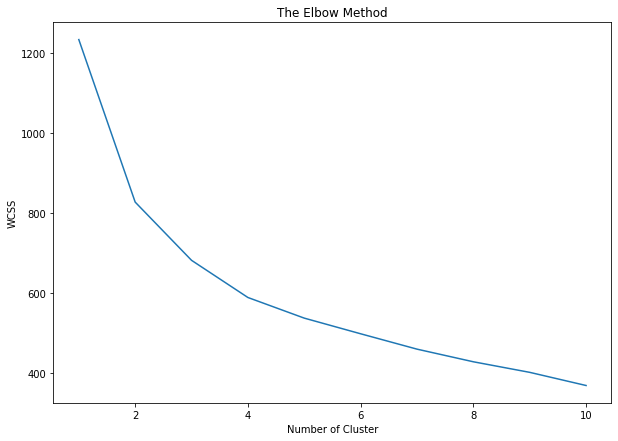

In [269]:
wcss = []
for i in range(1,11):
    kmeans_n = KMeans(n_clusters=i,init='k-means++',random_state=1234)
    kmeans_n.fit(countries_std)
    wcss.append(kmeans_n.inertia_)

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("The Elbow Method")
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("WCSS")

ax.plot(range(1,11),wcss)
plt.show()

Hasil dari elbow method yaitu menyarankan menggunakan 3 n cluster, tetapi untuk memastikan bahwa jumlah cluster yang paling optimal, kita akan menggunakan  silhouette score

#### Silhouette Score

Silhoutte score adalah metrics yang digunakan untuk menghitung performa sebuah cluster. Nilainya berkisar dari -1 hingga 1.
- 1 : Berarti cluster terpisah satu sama lain dan dibedakan dengan jelas
- 0 : Berarti clusters indeferen atau bisa dikatakan jarak antar cluster tidak signifikan
- -1 : Berarti cluster ditugaskan dengan cara yang salah

In [270]:
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(countries_std)
    labels = kmeans.labels_
    print(i,"ncluster =",silhouette_score(countries_std, labels=labels))

2 ncluster = 0.2792443774864483
3 ncluster = 0.2377043110132081
4 ncluster = 0.228614240079208
5 ncluster = 0.21499919813663065


Dari hasil silhouette score tersebut menunjukan jumlah cluster yang paling optimal adalah 2 cluster. Namun nilai pada silhouette score masih sangat kecil, itu dikarenakan kita masih menggunakan high-demension features atau mengguanakn feature yang banyak, untuk itu kita akan mencoba mengurangi jumlah feature dari 9 feature menjadi 3 feature saja

#### Feature Selection

Dalam memilih feature mana yang memiliki nilai silhouette terbaik, kita akan mencoba melakukan semua kombinasi 3 feature dan n_cluster untuk mendapatkan nilai silhouette score terbaik.

In [271]:
df = pd.DataFrame(columns=['feature1','feature2','feature3','n_cluster','score'])
for column1 in countries_std.columns:
    for column2 in countries_std.columns:
        for column3 in countries_std.columns:
            if (column1 != column2) and (column1 != column3) and (column2 != column3):
                max_score = 0
                n=0
                data = countries_std[[column1,column2,column3]]
                for i in range(2,6):
                    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
                    kmeans.fit(data)
                    labels = kmeans.labels_
                    score = silhouette_score(data, labels=labels)
                    if max_score<score:
                        max_score = score
                        n = i
                    
                df = df.append({'feature1':column1,'feature2':column2,'feature3':column3,'n_cluster':n,'score':max_score},ignore_index=True)

In [272]:
df.sort_values(['score'],ascending=False).reset_index(drop = True)

,feature1,feature2,feature3,n_cluster,score
0,Jumlah_fertiliti,Kematian_anak,Harapan_hidup,2,0.616790
1,Harapan_hidup,Kematian_anak,Jumlah_fertiliti,2,0.616790
2,Jumlah_fertiliti,Harapan_hidup,Kematian_anak,2,0.616790
3,Kematian_anak,Harapan_hidup,Jumlah_fertiliti,2,0.616790
4,Kematian_anak,Jumlah_fertiliti,Harapan_hidup,2,0.616790
...,...,...,...,...,...
499,Kesehatan,Pendapatan,Impor,3,0.299794
500,Pendapatan,Impor,Kesehatan,3,0.299794
501,Impor,Pendapatan,Kesehatan,3,0.299794
502,Pendapatan,Kesehatan,Impor,3,0.299794


setelah melakukan pengurangan jumlah feature dan mencari kombinasi feature, kita mendapatkan nilai silhouette score terbaik yaitu 0,616 yang mana nilai terbilang bagus untuk performa k-means.

Kita akan menggunakan kolom Jumlah_fertiliti, Kematian_anak, dan Harapan_hidup sebagai features serta 2 n_cluster untuk model kmeans

In [273]:
feature_selected = countries_std[['Jumlah_fertiliti','Kematian_anak','Harapan_hidup']]

#### Using 2 n_clusters to kmeans model

In [274]:
kmeans_n2 = KMeans(n_clusters=2, init='k-means++',max_iter=1000,random_state=42)
kmeans_n2.fit(feature_selected)
y_kmeans_n2 = kmeans_n2.labels_
countries_n2 = feature_selected.copy()
countries_n2['label'] = y_kmeans_n2

center_n2 = kmeans_n2.cluster_centers_

Dengan menggunakan 2 jumlah cluster dan menggunakan feature Jumlah_fertiliti, Kematian_anak, dan Harapan_hidup kita mendapatkan silhouette score yaitu 0,61679

Untuk melihat hasil dari clustering, kita akan memploting klaster - klaster tersebut menggunakan sacatter 3d plot

#### Ploting clustering result

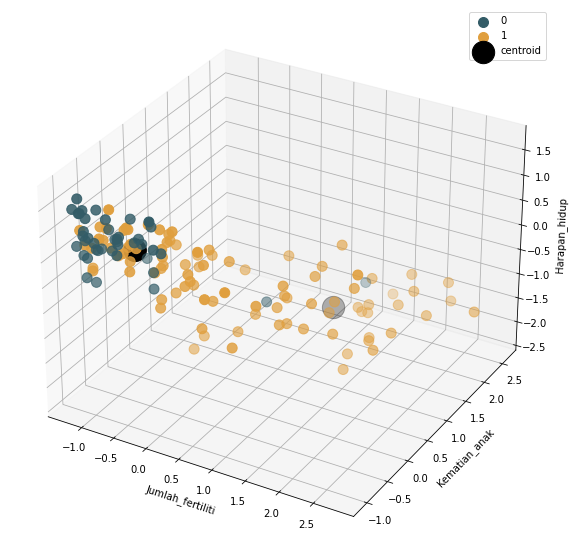

In [275]:
%matplotlib inline
color = ['#335c67','#e09f3e']
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

for i in range(0,2):
    xline = countries_n2.values[y_kmeans_n5==i,0]
    yline = countries_n2.values[y_kmeans_n5==i,1]
    zline = countries_n2.values[y_kmeans_n5==i,2]
    ax.scatter3D(xline, yline, zline,c=color[i],s=100,label= i)
ax.scatter3D(center_n2[:,0],center_n2[:,1],center_n2[:,2],c='black',s=500,label='centroid')
ax.set_xlabel("Jumlah_fertiliti")
ax.set_ylabel("Kematian_anak")
ax.set_zlabel("Harapan_hidup")
ax.legend()
plt.show()

Berdasarkan hasil ploting kita bisa menyimpulkannya sebagai berikut:
- untuk klaster 1 merupakan negara - negara yang memiliki jumlah fertiliti yang kecil, kematian anak yang kecil, dan harapan hidup yang tinggi.
- Pada klaster 2 merupakan negara - negara yang memiliki jumlah fertiliti yang tinggi, kematian anak yang tinggi, harapan hidup tinggi

### 6. Report Countries

Sesuai dengan tujuan dari project ini yaitu untuk menenentukan prioritas negara mana saja yang layak mendapatkan bantuan. pada tahap ini kita akan menentukan klaster mana yang diprioritaskan mendapat bantuan.

#### Countries Clustered

In [276]:
countries_labeled = pd.concat([country,outlier_removed[['Jumlah_fertiliti','Kematian_anak','Harapan_hidup']]],axis=1)
countries_labeled['label'] = y_kmeans_n5
countries_labeled

,Negara,Jumlah_fertiliti,Kematian_anak,Harapan_hidup,label
0,Afghanistan,5.82,90.2,56.2,1
1,Albania,1.65,16.6,76.3,1
2,Algeria,2.89,27.3,76.5,1
3,Angola,6.16,119.0,60.1,1
4,Antigua and Barbuda,2.13,10.3,76.8,0
...,...,...,...,...,...
132,Vanuatu,3.50,29.2,63.0,1
133,Venezuela,2.47,17.1,75.4,0
134,Vietnam,1.95,23.3,73.1,1
135,Yemen,4.67,56.3,67.5,1


#### Statistic Summary by Cluster

In [277]:
countries_groupby = countries_labeled.groupby(['label'])[['Negara','Jumlah_fertiliti','Kematian_anak','Harapan_hidup']].mean().reset_index()
countries_groupby

,label,Jumlah_fertiliti,Kematian_anak,Harapan_hidup
0,0,2.010238,14.847619,75.092857
1,1,3.656421,53.990526,66.703158


####  Plotting for each features by Cluster

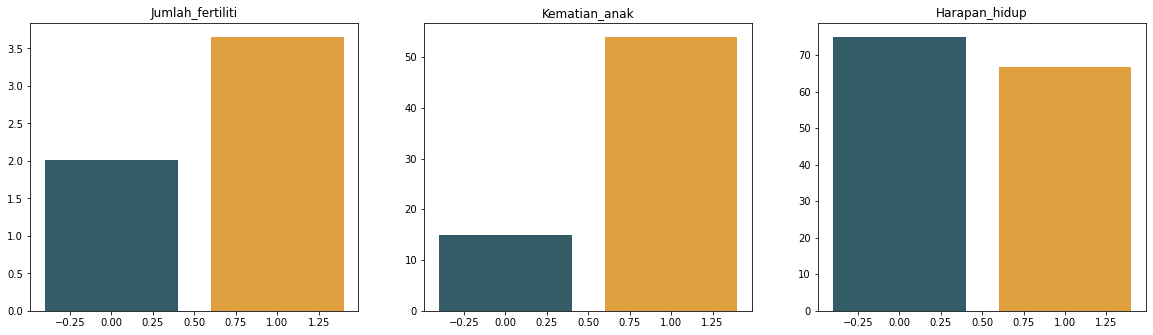

In [278]:
color = ['#335c67','#e09f3e']

plt.figure(figsize=(20,18))
for i in range(1,len(countries_groupby.columns)):
    plt.subplot(3,3,i)
    plt.bar(countries_groupby['label'],countries_groupby.iloc[:,i].values,color=color)
    plt.title(countries_groupby.columns[i])
plt.show()

Mengingat hasil dari analisis bivarate yaitu negera yang memiliki jumlah fertiliti dan kematian anak yang tinggi merupakan negara berkembang, serta negara yang memiliki angka harapan hidup yang tinggi merupakan negara - negara maju

Jika kita melihat dari hasil summary statistic dan ploting feature berdasarkan tiap klasternya, maka klaster 1 lah kelompok negara yang diprioritaskan untuk mendapatkan bantuan karena pada klaster 1 memiliki jumlah fertiliti dan kematian anak yang tinggi serta harapan hidup yang lebih kecil dibanding klaster 0.

#### Cluster 1 already sorted

Berikut merupakan daftar negara yang mendaptkan prioritas untuk bantuan yang sudah diurutakan berdasarkan kematian anak (descending), jumlah fetiliti (descending), dan harapan hidup (ascending)

In [279]:
priority_countries = countries_labeled[countries_labeled['label']==1].sort_values(['Kematian_anak','Jumlah_fertiliti','Harapan_hidup'],ascending=[False,False,True]).reset_index(drop=True)
priority_countries 

,Negara,Jumlah_fertiliti,Kematian_anak,Harapan_hidup,label
0,Chad,6.59,138.3,56.5,1
1,Sierra Leone,5.20,138.3,55.0,1
2,Mali,6.55,137.0,59.5,1
3,Nigeria,5.84,130.0,60.5,1
4,Niger,7.49,123.0,58.8,1
...,...,...,...,...,...
90,"Macedonia, FYR",1.47,10.4,74.0,1
91,Costa Rica,1.92,10.2,80.4,1
92,Serbia,1.40,7.6,74.7,1
93,Bosnia and Herzegovina,1.31,6.9,76.8,1


<h1 align='center'> End <h1>